In [1]:
import pandas as pd
import numpy as np

In [ ]:
##### 데이터 호출

In [2]:
offline = pd.read_csv("datas/문화누리카드 오프라인 가맹점 목록_20211222.csv", encoding = "UTF-8")
offline

,지역,가맹점명,분류,주소
0,강원,강원 양구 오미 정보화마을,관광지,강원 양구군 방산면 평화로 4818
1,강원,휴펜션,숙박,강원 영월군 무릉도원면 무릉법흥로 782-26
2,강원,힐탑하우스,숙박,강원 원주시 단계동 860
3,강원,귀빈스튜디오,미술,강원 정선군 정선읍 봉양1길 94
4,강원,천연비누공방,문화체험,강원도 철원군 동송읍 금학로217번길 14-1 갯마을 천연비누공방
...,...,...,...,...
23478,충북,JTA 합기도 검은독수리 동부도장,체육시설,"충청북도 청주시 상당구 용담로82번길 27 1(탑동,201호)"
23479,충북,힐링센터 어린이 수영장,체육시설,충청북도 청주시 상당구 1순환로 1521 힐링센터 지하 2층
23480,충북,파란악기,음악,충청북도 청주시 흥덕구 직지대로 556 생활의국밥 2층
23481,충북,태평양스포츠,체육용품,충북 제천시 풍양로 141


In [3]:
offline.isna().sum()  # 결측값 확인

지역      0
가맹점명    0
분류      0
주소      0
dtype: int64

In [4]:
ser_re_off = offline.지역.value_counts()  # 지역별 가맹점 수
ser_re_off

서울      3281
경기남부    2791
강원      1714
경북      1677
전북      1493
경남      1471
경기북부    1462
부산      1371
전남      1323
충남      1130
충북       948
광주       937
인천       915
대구       874
대전       751
제주       736
울산       470
세종       139
Name: 지역, dtype: int64

In [5]:
offline.지역.value_counts().sum()  # 총 데이터 수

23483

In [6]:
offline.지역.unique()

array(['강원 ', '경기북부', '경기남부', '경남 ', '경북 ', '광주 ', '대구 ', '대전 ', '부산 ',
       '서울 ', '세종 ', '울산 ', '인천 ', '전남 ', '전북 ', '제주 ', '충남 ', '충북 '],
      dtype=object)

In [7]:
offline.지역 = offline.지역.str[:-1]

In [8]:
offline.지역.unique()

array(['강원', '경기북', '경기남', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종',
       '울산', '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [9]:
offline_reg = offline[offline['지역'].isin(["서울", "경기남", "경기북"])]
offline_reg

,지역,가맹점명,분류,주소
1714,경기북,메이플,숙박,경기 가평군 행자골길 36-27
1715,경기북,에코스파펜션,숙박,경기 가평군 가평읍 금대리 55-36
1716,경기북,나무나무,숙박,경기 가평군 가평읍 두밀리194 1층
1717,경기북,하나스포츠,체육용품,경기 가평군 가평읍 가화로 50
1718,경기북,가평 터미널,교통수단,경기 가평군 가평읍 가화로 51
...,...,...,...,...
16324,서울,(주)댄스아트라인(공연),공연,서울 성북구 동소문로23길 8-12 지안빌딩 5층
16325,서울,삼천리자전거 위례점,체육용품,서울시 송파구 위례광장로 230번지 1층 126호
16326,서울,스피릿앙상블,공연,서울특별시 중랑구 용마산로122길 2
16327,서울,자연스튜디오,미술,"서울 은평구 연서로29길 7, 1층"


In [10]:
ser_offline_cat = offline_reg.분류.value_counts().sort_values(ascending = False)  # 서울/경기지역 분류별 가맹점 수
ser_offline_cat

미술       1536
도서       1331
체육시설     1150
체육용품      732
숙박        670
문화체험      574
교통수단      310
관광지       275
영상        270
공연        262
여행사       210
음악        191
스포츠관람      23
Name: 분류, dtype: int64

In [ ]:
##### 서울/경기 시각화 - 막대그래프

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
%matplotlib inline
mpl.rcParams['font.family'] = 'NanumGothic'
print(mpl.rcParams['font.family'])

['NanumGothic']


In [13]:
# 분류별 오프라인 가맹점 수

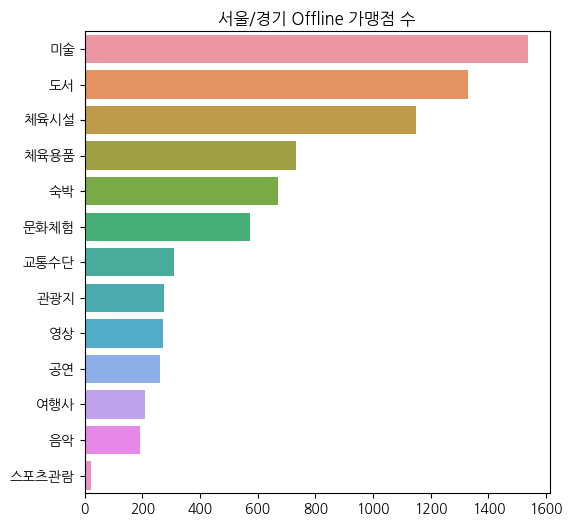

In [13]:
plt.figure(figsize = (6, 6))
sns.barplot(x = ser_offline_cat, y = ser_offline_cat.index)
plt.title("서울/경기 Offline 가맹점 수")
plt.xlabel(None)
plt.show()

In [ ]:
##### 전국 단위 시각화 - 막대그래프

In [14]:
ser_offline_reg = offline.지역.value_counts().sort_values(ascending = False)  # 지역별 가맹점 수
ser_offline_reg

서울     3281
경기남    2791
강원     1714
경북     1677
전북     1493
경남     1471
경기북    1462
부산     1371
전남     1323
충남     1130
충북      948
광주      937
인천      915
대구      874
대전      751
제주      736
울산      470
세종      139
Name: 지역, dtype: int64

In [ ]:
# 지역별 가맹점 수

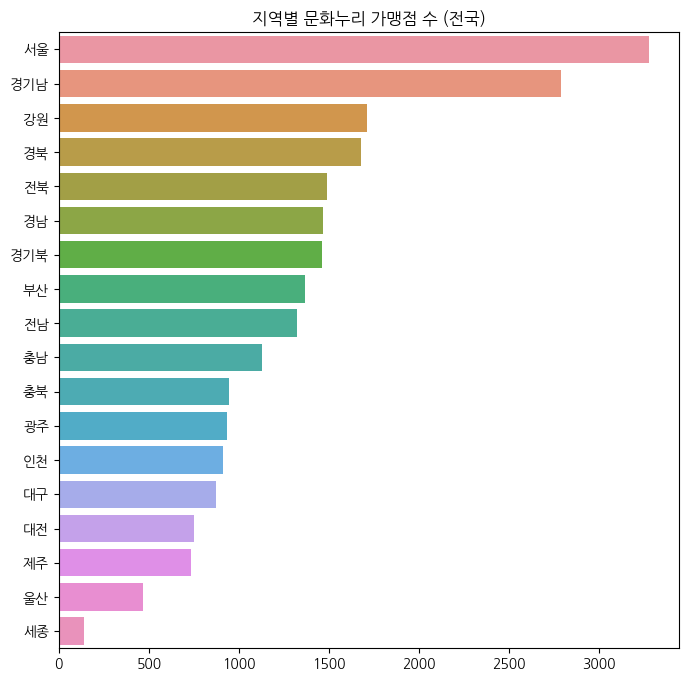

In [15]:
plt.figure(figsize = (8, 8))
sns.barplot(x = ser_offline_reg, y = ser_offline_reg.index)
plt.title("지역별 문화누리 가맹점 수 (전국)")
plt.xlabel(None)
plt.show()

In [17]:
##### 지도 시각화

In [ ]:
# 한반도 지도 생성

In [16]:
import folium
from folium.plugins import HeatMap

center = [36.5, 127.5]
zoom = 7

m = folium.Map(location=center, zoom_start=zoom)
m

## 경기도 분리 전 데이터

### 1) json 라이브러리 호출

In [17]:
import requests
import json

### 2) 다운로드 받은 json 위치 데이터 호출 후 도시 이름 확인

In [18]:
with open("datas/SIDO_MAP_2022.json", 'r', encoding = "UTF-8") as json_file :
    json_kor = json.load(json_file)

In [19]:
json_kor

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[126.984, 37.636],
      [126.948, 37.657],
      [126.912, 37.644],
      [126.897, 37.589],
      [126.854, 37.574],
      [126.801, 37.59],
      [126.772, 37.548],
      [126.821, 37.541],
      [126.819, 37.479],
      [126.872, 37.485],
      [126.903, 37.434],
      [126.959, 37.439],
      [127.003, 37.467],
      [127.071, 37.432],
      [127.127, 37.469],
      [127.131, 37.468],
      [127.132, 37.468],
      [127.132, 37.469],
      [127.132, 37.47],
      [127.133, 37.471],
      [127.133, 37.472],
      [127.133, 37.474],
      [127.133, 37.475],
      [127.134, 37.475],
      [127.135, 37.474],
      [127.136, 37.474],
      [127.144, 37.474],
      [127.144, 37.475],
      [127.144, 37.476],
      [127.147, 37.477],
      [127.148, 37.482],
      [127.156, 37.488],
      [127.155, 37.488],
      [127.156, 37.489],
      [127.158, 37.489],
      [127.15

In [20]:
len(json_kor["features"])  # 17  /  지역 개수와 동일

17

In [21]:
for Feature in json_kor["features"]:
    print(Feature)
    break

# 서울특별시 좌표 확인

{'type': 'Feature', 'geometry': {'type': 'Polygon', 'coordinates': [[[126.984, 37.636], [126.948, 37.657], [126.912, 37.644], [126.897, 37.589], [126.854, 37.574], [126.801, 37.59], [126.772, 37.548], [126.821, 37.541], [126.819, 37.479], [126.872, 37.485], [126.903, 37.434], [126.959, 37.439], [127.003, 37.467], [127.071, 37.432], [127.127, 37.469], [127.131, 37.468], [127.132, 37.468], [127.132, 37.469], [127.132, 37.47], [127.133, 37.471], [127.133, 37.472], [127.133, 37.474], [127.133, 37.475], [127.134, 37.475], [127.135, 37.474], [127.136, 37.474], [127.144, 37.474], [127.144, 37.475], [127.144, 37.476], [127.147, 37.477], [127.148, 37.482], [127.156, 37.488], [127.155, 37.488], [127.156, 37.489], [127.158, 37.489], [127.159, 37.49], [127.157, 37.49], [127.142, 37.516], [127.176, 37.575], [127.129, 37.566], [127.096, 37.689], [127.015, 37.701], [126.98, 37.656], [126.984, 37.636]]]}, 'properties': {'CTPRVN_CD': '11', 'CTP_ENG_NM': 'Seoul', 'CTP_KOR_NM': '서울특별시'}}


In [22]:
cities_name = [Feature["properties"]["CTP_KOR_NM"] for Feature in json_kor["features"]]
sorted(cities_name)

# json에 있는 도시 리스트

['강원도',
 '경기도',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도']

### 3-1) csv파일 지역 이름 -> json의 지역 이름으로 변환 - Dictionary 활용

In [23]:
city_dic = dict(offline.지역.value_counts())
city_dic

{'서울': 3281,
 '경기남': 2791,
 '강원': 1714,
 '경북': 1677,
 '전북': 1493,
 '경남': 1471,
 '경기북': 1462,
 '부산': 1371,
 '전남': 1323,
 '충남': 1130,
 '충북': 948,
 '광주': 937,
 '인천': 915,
 '대구': 874,
 '대전': 751,
 '제주': 736,
 '울산': 470,
 '세종': 139}

In [24]:
city_dic["경기도"] = city_dic.pop("경기남")
city_dic["서울특별시"] = city_dic.pop("서울")
city_dic["강원도"] = city_dic.pop("강원")
city_dic["경상북도"] = city_dic.pop("경북")
city_dic["전라북도"] = city_dic.pop("전북")
city_dic["경상남도"] = city_dic.pop("경남")
city_dic["부산광역시"] = city_dic.pop("부산")
city_dic["전라남도"] = city_dic.pop("전남")
city_dic["충청남도"] = city_dic.pop("충남")
city_dic["충청북도"] = city_dic.pop("충북")
city_dic["광주광역시"] = city_dic.pop("광주")
city_dic["인천광역시"] = city_dic.pop("인천")
city_dic["대구광역시"] = city_dic.pop("대구")
city_dic["대전광역시"] = city_dic.pop("대전")
city_dic["제주특별자치도"] = city_dic.pop("제주")
city_dic["울산광역시"] = city_dic.pop("울산")
city_dic["세종특별자치시"] = city_dic.pop("세종")

In [25]:
city_dic

{'경기북': 1462,
 '경기도': 2791,
 '서울특별시': 3281,
 '강원도': 1714,
 '경상북도': 1677,
 '전라북도': 1493,
 '경상남도': 1471,
 '부산광역시': 1371,
 '전라남도': 1323,
 '충청남도': 1130,
 '충청북도': 948,
 '광주광역시': 937,
 '인천광역시': 915,
 '대구광역시': 874,
 '대전광역시': 751,
 '제주특별자치도': 736,
 '울산광역시': 470,
 '세종특별자치시': 139}

In [ ]:
# .pop()메서드가 2개의 value를 합치지 못해 경기도의 value값을 직접 계산함

In [26]:
city_dic2 = {'경기도': 4253, '서울특별시': 3281, '강원도': 1714, '경상북도': 1677, '전라북도': 1493, '경상남도': 1471,
             '부산광역시': 1371, '전라남도': 1323, '충청남도': 1130, '충청북도': 948, '광주광역시': 937, '인천광역시': 915,
             '대구광역시': 874, '대전광역시': 751, '제주특별자치도': 736, '울산광역시': 470, '세종특별자치시': 139}
city_dic2

{'경기도': 4253,
 '서울특별시': 3281,
 '강원도': 1714,
 '경상북도': 1677,
 '전라북도': 1493,
 '경상남도': 1471,
 '부산광역시': 1371,
 '전라남도': 1323,
 '충청남도': 1130,
 '충청북도': 948,
 '광주광역시': 937,
 '인천광역시': 915,
 '대구광역시': 874,
 '대전광역시': 751,
 '제주특별자치도': 736,
 '울산광역시': 470,
 '세종특별자치시': 139}

### 3-2) Data frame 만들기

In [27]:
city_counts_df = pd.DataFrame({"City": city_dic2.keys(),
                               "Count": city_dic2.values()})
city_counts_df

,City,Count
0,경기도,4253
1,서울특별시,3281
2,강원도,1714
3,경상북도,1677
4,전라북도,1493
5,경상남도,1471
6,부산광역시,1371
7,전라남도,1323
8,충청남도,1130
9,충청북도,948


### 4) 지도 그리기

In [28]:
# 지도 Setting
center = [36.5, 127.5]
zoom = 7
m = folium.Map(location=center, zoom_start=zoom)

folium.Choropleth(geo_data = json_kor,
                  data = city_counts_df, columns = ["City", "Count"],
                  key_on = "feature.properties.CTP_KOR_NM",
                  threshold_scale = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
                  fill_color = "YlGn",
                  fill_opacity = 0.7,
                  line_opacity = 0.2,
                  legend_name = "가맹점 수").add_to(m)

folium.LayerControl().add_to(m)
m

In [106]:
m.save("offline.html")  # 저장

## 경기남/경기북 분리한 그래프

### 1) json파일 호출

In [29]:
import json

In [30]:
with open("datas/SIDO_MAP_2022(1).json", 'r', encoding = "UTF-8") as json_file :
    json_kor2 = json.load(json_file)

In [31]:
len(json_kor2["features"])  # 읽힘

18

In [32]:
cities_name2 = [Feature["properties"]["CTP_KOR_NM"] for Feature in json_kor2["features"]]
sorted(cities_name2)  # 확인용

['강원도',
 '경기남',
 '경기북',
 '경상남도',
 '경상북도',
 '광주광역시',
 '대구광역시',
 '대전광역시',
 '부산광역시',
 '서울특별시',
 '세종특별자치시',
 '울산광역시',
 '인천광역시',
 '전라남도',
 '전라북도',
 '제주특별자치도',
 '충청남도',
 '충청북도']

In [39]:
city_dic["경기남"] = city_dic.pop("경기도")
city_dic

{'경기북': 1462,
 '서울특별시': 3281,
 '강원도': 1714,
 '경상북도': 1677,
 '전라북도': 1493,
 '경상남도': 1471,
 '부산광역시': 1371,
 '전라남도': 1323,
 '충청남도': 1130,
 '충청북도': 948,
 '광주광역시': 937,
 '인천광역시': 915,
 '대구광역시': 874,
 '대전광역시': 751,
 '제주특별자치도': 736,
 '울산광역시': 470,
 '세종특별자치시': 139,
 '경기남': 2791}

### 2) Data frame 만들기

In [40]:
city_dic

{'경기북': 1462,
 '서울특별시': 3281,
 '강원도': 1714,
 '경상북도': 1677,
 '전라북도': 1493,
 '경상남도': 1471,
 '부산광역시': 1371,
 '전라남도': 1323,
 '충청남도': 1130,
 '충청북도': 948,
 '광주광역시': 937,
 '인천광역시': 915,
 '대구광역시': 874,
 '대전광역시': 751,
 '제주특별자치도': 736,
 '울산광역시': 470,
 '세종특별자치시': 139,
 '경기남': 2791}

In [41]:
city_counts_df2 = pd.DataFrame({"City": city_dic.keys(),
                               "Count": city_dic.values()})
city_counts_df2

,City,Count
0,경기북,1462
1,서울특별시,3281
2,강원도,1714
3,경상북도,1677
4,전라북도,1493
5,경상남도,1471
6,부산광역시,1371
7,전라남도,1323
8,충청남도,1130
9,충청북도,948


### 3) 최종 지도

In [42]:
center = [36.5, 127.5]
zoom = 7
m = folium.Map(location = center, zoom_start = zoom)

folium.Choropleth(geo_data = json_kor2,
                  data = city_counts_df2, columns = ["City", "Count"],
                  key_on = "feature.properties.CTP_KOR_NM",
                  threshold_scale = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
                  fill_color = "YlGn",
                  fill_opacity = 0.7,
                  line_opacity = 0.2,
                  legend_name = "가맹점 수").add_to(m)

folium.LayerControl().add_to(m)
m

In [104]:
m.save("offline2.html")  # 저장

경기 북부와 경기 남부가 지도 위에 분리되어 표시됨

### 4) 시/도 인구수와 지도 비교

In [43]:
population_dic = {'경기남': 10045663, '경기북': 3530304, '서울특별시': 9427583, '강원도': 1536498, '경상북도': 2594399, '전라북도': 1766254,
                  '경상남도': 3272381, '부산광역시': 3315516, '전라남도': 1814858, '충청남도': 2123625, '충청북도': 1593434, '광주광역시': 1428927,
                  '인천광역시': 2971888, '대구광역시': 2360662, '대전광역시': 1445875, '제주특별자치도': 677090, '울산광역시': 1108665, '세종특별자치시': 385285}
population_dic

# 2022.06 ~ 2023.02 사이 인구 데이터

{'경기남': 10045663,
 '경기북': 3530304,
 '서울특별시': 9427583,
 '강원도': 1536498,
 '경상북도': 2594399,
 '전라북도': 1766254,
 '경상남도': 3272381,
 '부산광역시': 3315516,
 '전라남도': 1814858,
 '충청남도': 2123625,
 '충청북도': 1593434,
 '광주광역시': 1428927,
 '인천광역시': 2971888,
 '대구광역시': 2360662,
 '대전광역시': 1445875,
 '제주특별자치도': 677090,
 '울산광역시': 1108665,
 '세종특별자치시': 385285}

In [44]:
population_df = pd.DataFrame({"City": population_dic.keys(),
                               "Count": population_dic.values()})
population_df

,City,Count
0,경기남,10045663
1,경기북,3530304
2,서울특별시,9427583
3,강원도,1536498
4,경상북도,2594399
5,전라북도,1766254
6,경상남도,3272381
7,부산광역시,3315516
8,전라남도,1814858
9,충청남도,2123625


In [46]:
center = [36.5, 127.5]
zoom = 7
m = folium.Map(location=center, zoom_start=zoom)

folium.Choropleth(geo_data = json_kor2,
                  data = population_df, columns = ["City", "Count"],
                  key_on = "feature.properties.CTP_KOR_NM",
                  threshold_scale = [300_000, 500_000, 1_000_000, 2_000_000, 3_000_000, 5_000_000, 7_000_000, 9_000_000, 10_100_000],
                  fill_color = "YlGn",
                  fill_opacity = 0.7,
                  line_opacity = 0.2,
                  legend_name = "인구수").add_to(m)

folium.LayerControl().add_to(m)
m

In [115]:
m.save("population.html")  # 저장

## folium marker 표시

### 1) Data frame 만들고 전처리

In [47]:
import pandas as pd

ns = pd.read_excel("datas/누리샘플.xlsx")
ns

,Unnamed: 0,지역,가맹점명,분류,주소,Latitude,Longitude
0,21325,전남,오즈모텔,숙박,전라남도 영암군 신북면 금교로 11 로즈모텔,34.911211,126.701233
1,12622,경기,블랑호텔,숙박,경기 과천시 중앙로 131 현대빌딩 (중앙동),37.428338,126.991340
2,7549,경북,경산 용암웰빙스파,관광지,경북 경산시 압량면 금구길 23 (금구리),35.853715,128.764743
3,14121,충북,야생화느낌자수(궁중매듭공예),문화체험,충청북도 제천시 풍양로 108 중앙시장상가 2층 가동 104호,37.136624,128.211350
4,13335,인천,남동볼링센터,체육시설,"인천 남동구 인하로535번길 39 1,2층",37.444824,126.706146
...,...,...,...,...,...,...,...
957,12236,부산,화명스포렉스,체육시설,부산 북구 금곡대로285번길 13 B2201호볼링장,35.233722,129.012752
958,10605,전남,LG헬로비전 호남방송(케이블티비),영상,전남 목포시 하당로 115-158667,34.801647,126.414546
959,19443,인천,평화렛츠협동조합,문화체험,인천광역시 부평구 경인로1104번길 10 신협빌딩 지층,37.485314,126.742103
960,17050,서울,고투(GOTO) 청담점,체육시설,서울 강남구 학동로 88길 12 청진빌딩 B1,37.518300,127.052625


In [48]:
ns_mar = ns[["지역", "분류", "Latitude", "Longitude"]]
ns_mar

,지역,분류,Latitude,Longitude
0,전남,숙박,34.911211,126.701233
1,경기,숙박,37.428338,126.991340
2,경북,관광지,35.853715,128.764743
3,충북,문화체험,37.136624,128.211350
4,인천,체육시설,37.444824,126.706146
...,...,...,...,...
957,부산,체육시설,35.233722,129.012752
958,전남,영상,34.801647,126.414546
959,인천,문화체험,37.485314,126.742103
960,서울,체육시설,37.518300,127.052625


In [49]:
len(ns_mar)

962

### 2) 지도 생성 후 마커 표시

In [50]:
center = [36.5, 127.5]
zoom = 7
m = folium.Map(location = center, zoom_start = 7)
m

for i in ns_mar.index:
    reg = ns_mar.loc[i, '지역']
    cat = ns_mar.loc[i, '분류']
    lat = ns_mar.loc[i, 'Latitude']
    lon = ns_mar.loc[i, 'Longitude']
    marker = folium.Marker([lat, lon], popup = reg).add_to(m)
m

### 3) 지역에 따라 marker 색깔 변경

In [53]:
ns_mar["지역"].unique()

array(['전남', '경기', '경북', '충북', '인천', '광주', '제주', '서울', '강원', '대구', '충남',
       '부산', '경남', '전북', '울산', '대전', '세종'], dtype=object)

In [56]:
m2 = folium.Map(location = [36.5, 127.5], zoom_start = 7)

from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(m2)

for lat, lon in zip(ns_mar.Latitude, ns_mar.Longitude):
    folium.Marker([lat, lon]).add_to(marker_cluster)
m2

In [57]:
m2.save("가맹점분포.html")